In [74]:
import torch
img_t = torch.abs(torch.randn((3, 5, 5)))    #<-- creates a tensor of the given size with values from a noramlly distributed random variable 
img_t /= torch.max(torch.abs(img_t))/255
weights = torch.tensor([0.2126, 0.7152, 0.0722])    #<-- weights to transform colors into grayscale

This code imports the PyTorch library and creates a 3-dimensional tensor `img_t` of size `(3, 5, 5)` with values drawn from a normal distribution using `torch.randn()`. 

The second line creates a tensor `weights` of size `(3,)` with the values `[0.2126, 0.7152, 0.0722]`. These values are the weights used to transform a color image into grayscale using a weighted sum of the color channels.

In [75]:
batch_t = torch.abs(torch.randn((2, 3, 5, 5)))     #<-- creates a tensor of the given size filled with RandN values
batch_t /= torch.max(torch.abs(batch_t))/255                                                        # shape [batch, channels, rows, columns]
                                                        # meaning we here have fabricated to "images" in the same batch

This code creates a 4-dimensional tensor `batch_t` of size `(2, 3, 5, 5)` with values drawn from a normal distribution using `torch.randn()`. 

The first dimension of size `2` represents the batch size, meaning that `batch_t` contains two images in the same batch. The second dimension of size `3` represents the number of color channels in each image, which is usually 3 for RGB images. The last two dimensions of size `5` represent the height and width of each image.

In [76]:
img_gray_naive = img_t.mean(-3)     #<-- averages the values in the 3rd dimention from the end, aka. the colors dimension
batch_grey_naive = batch_t.mean(-3) #<-- averages the values of the colors dimension, that's why we've chosen the 3rd from the end, it's because
                                    #    we may have a batch dimension, meaning the colors' order may be the 0th or the 1st, but it will be
                                    #    surely the 3rd from the end
            
img_gray_naive.shape, batch_grey_naive.shape

(torch.Size([5, 5]), torch.Size([2, 5, 5]))

This code computes the grayscale version of an image tensor `img_t` and a batch of image tensors `batch_t` using a naive method of averaging the color channels. 

The first line computes the grayscale version of `img_t` by taking the mean of the values in the third dimension from the end, which corresponds to the color channels. This results in a tensor of shape `(5, 5)`.

The second line computes the grayscale version of `batch_t` by taking the mean of the values in the third dimension from the end, which corresponds to the color channels. Since `batch_t` has a batch dimension as the first dimension, the `mean` operation is applied to each image in the batch separately. This results in a tensor of shape `(2, 5, 5)`. 

The output of this code is a tuple containing the shapes of the grayscale image tensor and the grayscale batch tensor, which are `(5, 5)` and `(2, 5, 5)` respectively.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


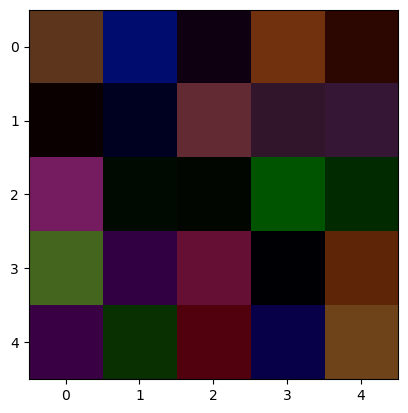

In [77]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(img_t.permute(1, 2, 0).reshape(5, 5, 3).numpy().astype(np.int8))  #<-- permute the dimensions of the tensor, so that the colors dimension is the last one
                                                                             #    so that imshow can plot it


In PyTorch, images are typically formatted as tensors with shape `(batch_size, channels, height, width)`, or `BCHW` for short. The `channels` dimension refers to the number of color channels in the image, which is usually 3 for RGB images (red, green, blue). 

However, when displaying an image using `matplotlib`, the color channels are expected to be the last dimension, so the tensor needs to be permuted to have shape `(height, width, channels)` or `HWC`.

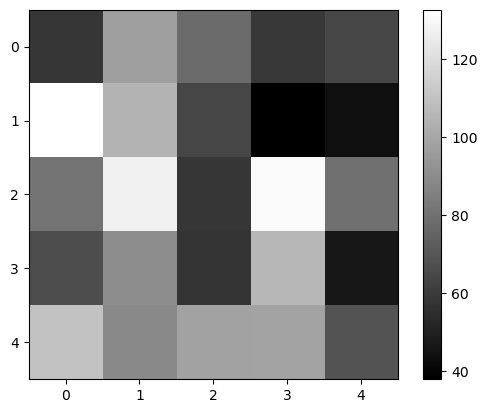

In [84]:
plt.imshow(img_gray_naive, cmap='gray'); #<-- cmap is the color map, we can choose the color map we want to use

This code displays a grayscale image `img_gray_naive` using the `imshow()` function from Matplotlib. The `cmap` parameter is used to specify the colormap to use for the image. In this case, the `'gray'` colormap is used, which displays the image in grayscale.

The `imshow()` function expects the input data to be in the form of a 2D array or a 3D array with the last dimension being 3 or 4 (for RGB or RGBA images, respectively). If the input data is a 2D array, it is assumed to be a grayscale image.

The `;` at the end of the line is used to suppress the output of the `imshow()` function, which would otherwise display the image object in the output cell.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


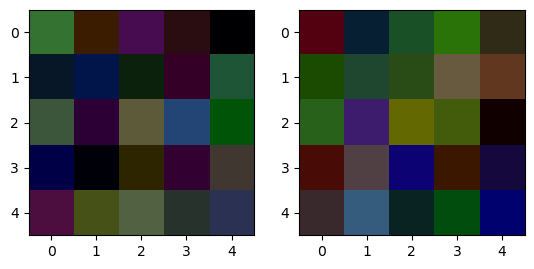

In [100]:
fig, ax = plt.subplots(1, 2)    #<-- creates a figure with 1 row and 2 columns
ax[0].imshow(batch_t[0].permute(1, 2, 0).reshape(5, 5, 3).numpy().astype(np.int8), cmap = 'viridis');
ax[1].imshow(batch_t[1].permute(1, 2, 0).reshape(5, 5, 3).numpy().astype(np.int8), cmap = 'viridis');

This code displays two images from a PyTorch tensor `batch_t` using the `imshow()` function from Matplotlib. The `fig, ax = plt.subplots(1, 2)` line creates a figure with 1 row and 2 columns, and returns a tuple containing the figure object and an array of two axes objects.

The first image is displayed on the first axis object `ax[0]`. The PyTorch tensor `batch_t[0]` is first permuted to have dimensions `(height, width, channels)` using `permute(1, 2, 0)`, then reshaped to have dimensions `(5, 5, 3)` using `reshape(5, 5, 3)`. Finally, the resulting tensor is converted to a NumPy array using `.numpy()` and cast to the `int8` data type using `.astype(np.int8)`. The resulting NumPy array is then displayed using `imshow()` with the `'viridis'` colormap.

The second image is displayed on the second axis object `ax[1]` using the same process as the first image.

Note that casting the tensor to `int8` may not be appropriate for displaying the image, as it may result in loss of precision. It is usually better to cast the tensor to `float` instead.

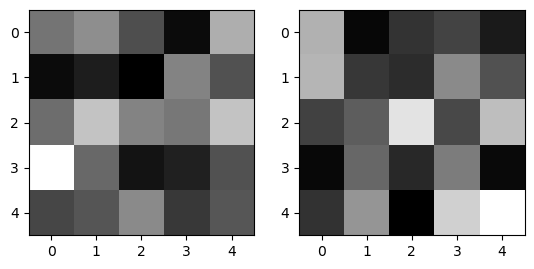

In [94]:
fig, ax = plt.subplots(1, 2)    #<-- creates a figure with 1 row and 2 columns
ax[0].imshow(batch_grey_naive[0], cmap='gray');
ax[1].imshow(batch_grey_naive[1], cmap='gray');

This code displays two grayscale images from a PyTorch tensor `batch_grey_naive` using the `imshow()` function from Matplotlib. The `fig, ax = plt.subplots(1, 2)` line creates a figure with 1 row and 2 columns, and returns a tuple containing the figure object and an array of two axes objects.

The first image is displayed on the first axis object `ax[0]` using `imshow()` with the `'gray'` colormap. The grayscale image is obtained from `batch_grey_naive[0]`, which is assumed to be a 2D tensor representing a single grayscale image.

The second image is displayed on the second axis object `ax[1]` using the same process as the first image, but with `batch_grey_naive[1]` instead.

Note that the `cmap` parameter is set to `'gray'` to indicate that the images are grayscale. If the images were in color, a different colormap would be used instead.

In [97]:
unsqueezed_weights = weights.unsqueeze(-1).unsqueeze_(-1)
img_gray_weighted = (img_t * unsqueezed_weights).sum(-3)    #<-- multiplies the tensor by the weights and then sums the values in the colors dimension
batch_grey_weighted = (batch_t * unsqueezed_weights).sum(-3)
weights.shape, batch_t.shape, unsqueezed_weights.shape

(torch.Size([3]), torch.Size([2, 3, 5, 5]), torch.Size([3, 1, 1]))

This code calculates a weighted average of the pixel values in a PyTorch tensor `img_t` and a batch of tensors `batch_t`, using a weight tensor `weights`. The weight tensor `weights` has shape `(3,)`, which means it contains one weight value for each color channel (red, green, and blue).

The first line of code `unsqueezed_weights = weights.unsqueeze(-1).unsqueeze_(-1)` unsqueezes the weight tensor twice along the last two dimensions, so that it has shape `(3, 1, 1)`. This allows the weight tensor to be broadcasted with the image tensors `img_t` and `batch_t` along the color channel dimension.

The second line of code `img_gray_weighted = (img_t * unsqueezed_weights).sum(-3)` multiplies the image tensor `img_t` by the unsqueezed weight tensor `unsqueezed_weights`, and then sums the resulting values along the color channel dimension (`-3`). This produces a weighted average of the pixel values in the image tensor `img_t`, where the weights are given by the values in the weight tensor `weights`.

The third line of code `batch_grey_weighted = (batch_t * unsqueezed_weights).sum(-3)` does the same thing as the second line of code, but for a batch of tensors `batch_t`.

The last line of code `weights.shape, batch_t.shape, unsqueezed_weights.shape` prints the shapes of the weight tensor `weights`, the batch tensor `batch_t`, and the unsqueezed weight tensor `unsqueezed_weights`.

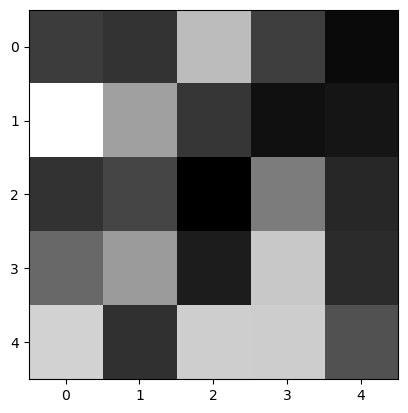

In [99]:
plt.imshow(img_gray_weighted, cmap='gray'); #<-- cmap is the color map, we can choose the color map we want to use

This code displays a grayscale image `img_gray_weighted` using the `imshow()` function from Matplotlib. The `cmap` parameter is used to specify the colormap to use for the image. In this case, the `'gray'` colormap is used, which displays the image in grayscale.

The `imshow()` function expects the input data to be in the form of a 2D array or a 3D array with the last dimension being 3 or 4 (for RGB or RGBA images, respectively). If the input data is a 2D array, it is assumed to be a grayscale image.

The `img_gray_weighted` tensor is obtained by calculating a weighted average of the pixel values in the original image tensor `img_t`, where the weights are given by the values in the weight tensor `weights`. The resulting tensor is then displayed using `imshow()` with the `'gray'` colormap.

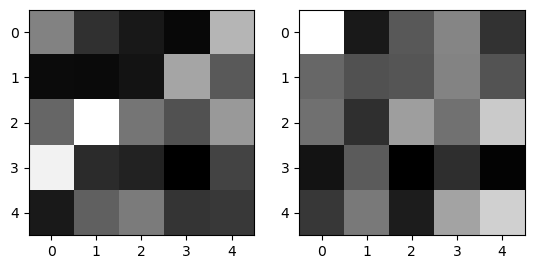

In [98]:
fig, ax = plt.subplots(1, 2)    #<-- creates a figure with 1 row and 2 columns
ax[0].imshow(batch_grey_weighted[0], cmap='gray');
ax[1].imshow(batch_grey_weighted[1], cmap='gray');

This code displays two grayscale images from a batch of PyTorch tensors `batch_grey_weighted` using the `imshow()` function from Matplotlib. The `fig, ax = plt.subplots(1, 2)` line creates a figure with 1 row and 2 columns, and returns a tuple containing the figure object and an array of two axes objects.

The first image is displayed on the first axis object `ax[0]` using `imshow()` with the `'gray'` colormap. The grayscale image is obtained from `batch_grey_weighted[0]`, which is assumed to be a 2D tensor representing a single grayscale image.

The second image is displayed on the second axis object `ax[1]` using the same process as the first image, but with `batch_grey_weighted[1]` instead.



In [101]:
img_gray_weighted_fancy = torch.einsum('...chw,c->...hw', img_t, weights)
batch_gray_weighted_fancy = torch.einsum('...chw,c->...hw', batch_t, weights)
batch_gray_weighted_fancy.shape

torch.Size([2, 5, 5])

This code calculates a weighted average of the pixel values in a PyTorch tensor `img_t` and a batch of tensors `batch_t`, using a weight tensor `weights`. The weight tensor `weights` has shape `(3,)`, which means it contains one weight value for each color channel (red, green, and blue).

The `torch.einsum()` function is used to perform a matrix multiplication between the image tensors and the weight tensor. The `'...chw,c->...hw'` string specifies the matrix multiplication operation to be performed. The `...` notation is used to indicate that the operation should be performed over all dimensions of the input tensors except for the last two dimensions (`height` and `width`). The `c` dimension of the weight tensor is multiplied with the `chw` dimensions of the image tensors, and the resulting values are summed over the `c` dimension. The resulting tensor has the same shape as the input tensors, except for the last dimension (`color`), which is removed.

The resulting tensor `img_gray_weighted_fancy` is a weighted average of the pixel values in the image tensor `img_t`, where the weights are given by the values in the weight tensor `weights`. The same process is applied to the batch of tensors `batch_t` to obtain the tensor `batch_gray_weighted_fancy`.

The last line of code `batch_gray_weighted_fancy.shape` prints the shape of the tensor `batch_gray_weighted_fancy`, which is `(2, 5, 5)` in this case.